In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as md
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from matplotlib.ticker import FormatStrFormatter
from numpy.linalg import eig

In [ ]:
def get_ratio (VAL):
    idx = np.where(VAL!= np.min(VAL))
    vala = VAL[idx]
    return np.max(vala) / np.min(vala)

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
plt.rcParams["figure.figsize"] = cm2inch(16,8)
plt.rcParams.update({'font.size':13})
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

def inertia (u, stride=100):
    D = []
    for ts in u.trajectory[::stride]:
        sel = u.select_atoms('name BB')
        pos = sel.positions
        COM = sel.center_of_mass()
        sel.positions = pos-COM 
        n_beads = sel.n_atoms
        I = sel.positions.T @ sel.positions.T.T
        val, vec = eig(I/n_beads)
        diff = get_ratio (val)
        D.append(diff)
    return D

In [4]:
M2_dir = '/home/au447022/Documents/GU/ND/ANALYSIS_Build_Martini2/'
M3_dir = '/home/au447022/Documents/GU/ND/ANALYSIS_Build_Martini3/'

In [5]:
def load_uni (sys, dirr):
    u = md.Universe(dirr+'GRO/{0:s}_v1_nowat.gro'.format(sys),
                    (dirr+'XTC/{0:s}_v1_nowat_fit.xtc'.format(sys),dirr+'XTC/{0:s}_v2_nowat_fit.xtc'.format(sys),
                     dirr+'XTC/{0:s}_v3_nowat_fit.xtc'.format(sys)))
    return u

In [6]:
systems_dir2 = {'1D1':'1D1_69', '1E3D1':'1E3D1_134', '2N2':'2N2_302',
               'NW9':'NW9_58', 'NW11':'NW11_73', 'NW13':'NW13_151'}
systems_dir3 = {'1D1':'1D1_69', '1E3D1':'1E3D1_134', '2N2':'2N2_302',
               'NW9':'NW9_57', 'NW11':'NW11_72', 'NW13':'NW13_150'}

In [7]:
system_labels = ['1D1', '1E3D1', '2N2', 'NW9', 'NW11', 'NW13']

In [10]:
U2 = []
for sys in system_labels:
    s = systems_dir2[sys]
    U2.append(load_uni(s, M2_dir))

/home/au447022/anaconda3/envs/lipyphilic/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/au447022/anaconda3/envs/lipyphilic/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: G
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


In [11]:
U3 = []
for sys in system_labels:
    s = systems_dir3[sys]
    U3.append(load_uni(s, M3_dir))

In [12]:
A2 = []
for u in U2:
    A2.append(inertia(u))
    print (np.average(inertia(u)))

1.271541
2.0907454
1.8959831
1.2477702
2.005546
1.9093176


In [13]:
A3 = []
for u in U3:
    A3.append(inertia(u))
    print (np.average(inertia(u)))

1.2145382
2.4951725
1.6856077
1.1834345
1.4357874
1.4098079


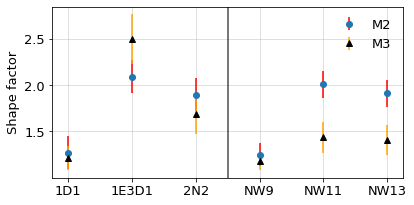

In [19]:
fig, ax = plt.subplots()

ava2 = [np.average(i) for i in A2]
std2 = [np.std(i) for i in A2]
ava3 = [np.average(i) for i in A3]
std3 = [np.std(i) for i in A3]


ax.errorbar([0,1,2,3,4,5], ava2, yerr=std2, fmt='o', ecolor='red', label='M2')
ax.errorbar([0,1,2,3,4,5], ava3, yerr=std3, fmt='^', ecolor='orange', color='black', label='M3')

ax.grid(alpha=0.5)
ax.set_ylabel('Shape factor')
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(system_labels)


ax.axvline(2.5, color='black', alpha=0.7)

ax.legend(loc='best', frameon=False)

plt.savefig('Shapes_M2_M3.png', dpi=300, bbox_inches='tight')